In [79]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [80]:
# Set random seed
np.random.seed(42)

# First set of circles: origin-centered
X1, y1 = make_circles(n_samples=1000, factor=0.4, noise=0.1)

# Second set
X2, y2 = make_circles(n_samples=1000, factor=0.4, noise=0.12, random_state=24)
X2 += np.random.normal(loc=[3, 3], scale=0.5, size=X2.shape)  # Randomized translation

# Combine sets
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Convert to DataFrame
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Class"] = y

In [81]:
df.head()

,Feature 1,Feature 2,Class
0,0.325956,0.180362,1
1,-0.284041,0.142219,1
2,-0.469180,0.293518,1
3,-0.347336,0.258668,1
4,0.454089,-0.890466,0


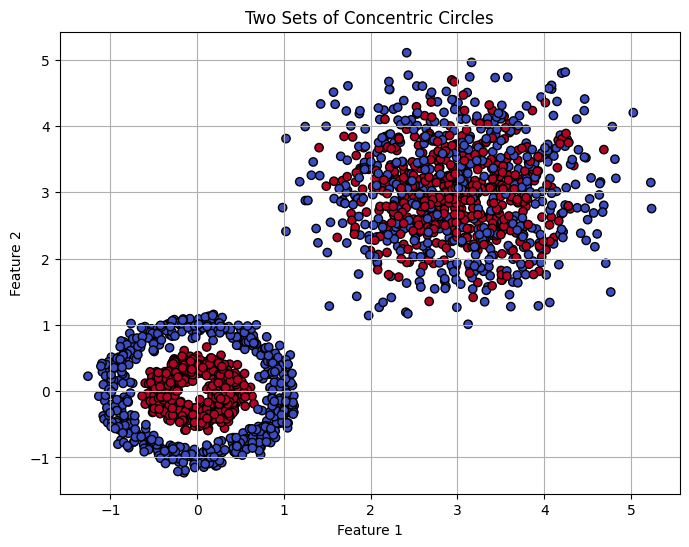

In [82]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(df["Feature 1"], df["Feature 2"], c=df["Class"], cmap="coolwarm", edgecolors="k")
plt.title("Two Sets of Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [83]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [86]:
model = Sequential()

model.add(Dense(64,activation='relu',input_dim=2))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [88]:
history1 = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4733 - loss: 0.6959 - val_accuracy: 0.5250 - val_loss: 0.6706
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5662 - loss: 0.6526 - val_accuracy: 0.6100 - val_loss: 0.6353
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6456 - loss: 0.6127 - val_accuracy: 0.7225 - val_loss: 0.5963
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7278 - loss: 0.5547 - val_accuracy: 0.7375 - val_loss: 0.5686
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7575 - loss: 0.5323 - val_accuracy: 0.6950 - val_loss: 0.5878
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7385 - loss: 0.4978 - val_accuracy: 0.7700 - val_loss: 0.4648
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.4175 - val_accuracy: 0.7850 - val_loss: 0.4131
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7996 - loss: 0.3875 - val_accuracy: 0.8000 - 

In [89]:
model = Sequential()

model.add(Dense(64,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,041 (11.88 KB)

 Non-trainable params: 224 (896.00 B)

In [90]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [91]:
history2 = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6682 - loss: 0.6063 - val_accuracy: 0.5300 - val_loss: 0.7036
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7527 - loss: 0.4612 - val_accuracy: 0.5450 - val_loss: 0.6836
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7913 - loss: 0.4259 - val_accuracy: 0.6675 - val_loss: 0.6636
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.4230 - val_accuracy: 0.6300 - val_loss: 0.6501
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7998 - loss: 0.3882 - val_accuracy: 0.6025 - val_loss: 0.6327
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8162 - loss: 0.3682 - val_accuracy: 0.6650 - val_loss: 0.6148
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 0.3620 - val_accuracy: 0.6650 - val_loss: 0.6513
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8165 - loss: 0.3754 - val_accuracy: 0.6550 - 

18750/18750 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step


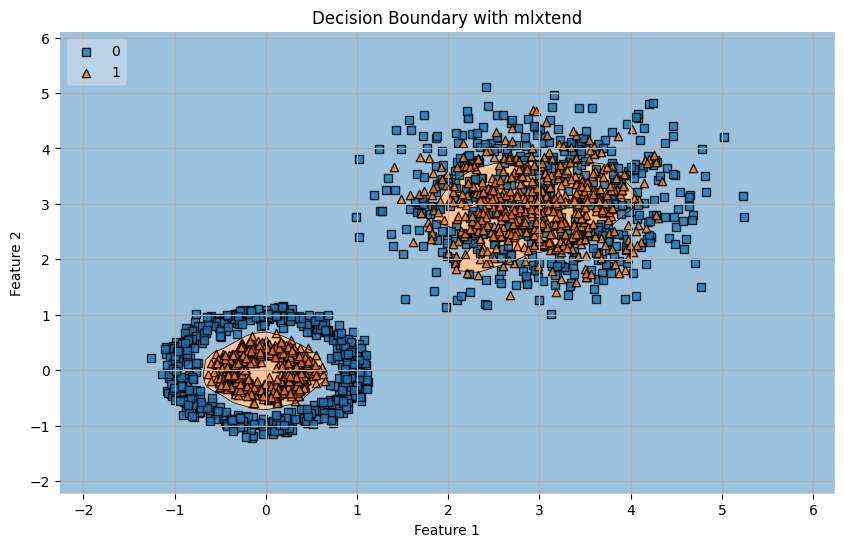

In [92]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

# Ensure labels are in integer format for mlxtend
y_int = y.astype(int)

# Plot decision regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X=X, y=y_int, clf=model, legend=2)

plt.title("Decision Boundary with mlxtend")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

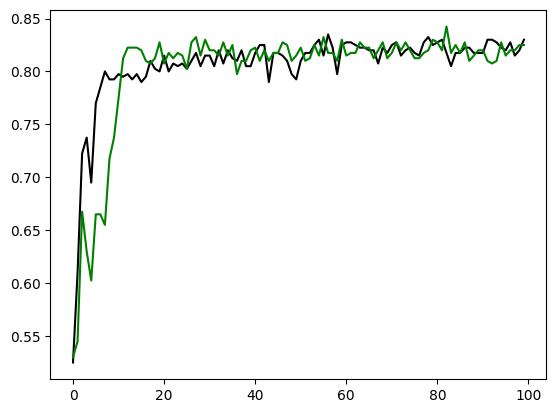

In [93]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')